In [212]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Task 1: Exploratory Data Analysis

1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.


In [213]:
#Load the dataset 
df = pd.read_csv("./ToyotaCorolla - MLR.csv")
df.head()  # Check the first few rows

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [214]:
# Basic dataset dimensions and summary statistics
print(df.shape)  # Shape of the dataset
df.describe()  # Summary statistics

(1436, 11)


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [215]:
# by looking at Gears, and Cylinders columns we ca see that it may have contain single value so lest's check unique values in key columns
print(df['Gears'].value_counts())  # Check distribution of 'Gears'
print(df['Cylinders'].value_counts()) # Check unique values in 'Cylinders'


5    1390
6      43
3       2
4       1
Name: Gears, dtype: int64
4    1436
Name: Cylinders, dtype: int64


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [217]:
#calculate the missing values in the dataset 
df.isnull().sum()
#we can see that there is no missign values in our dataset. which show the good sign about the data

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

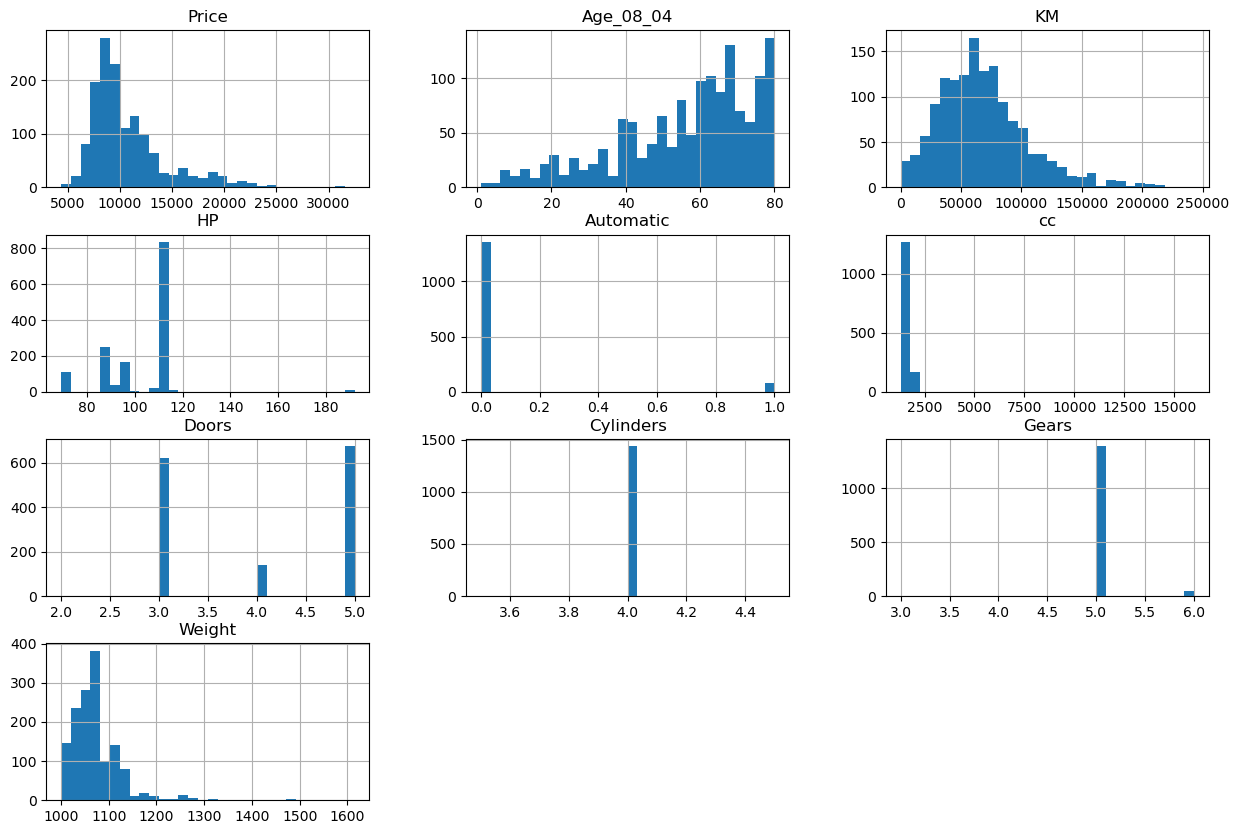

In [218]:
#plot the histogram to see the skewness and the distribution of the data 
df.hist(bins=30,figsize=(15, 10))
plt.show()
#we can see that there is skewnees in automatic, cc, and hp columns 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19164\2971665534.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


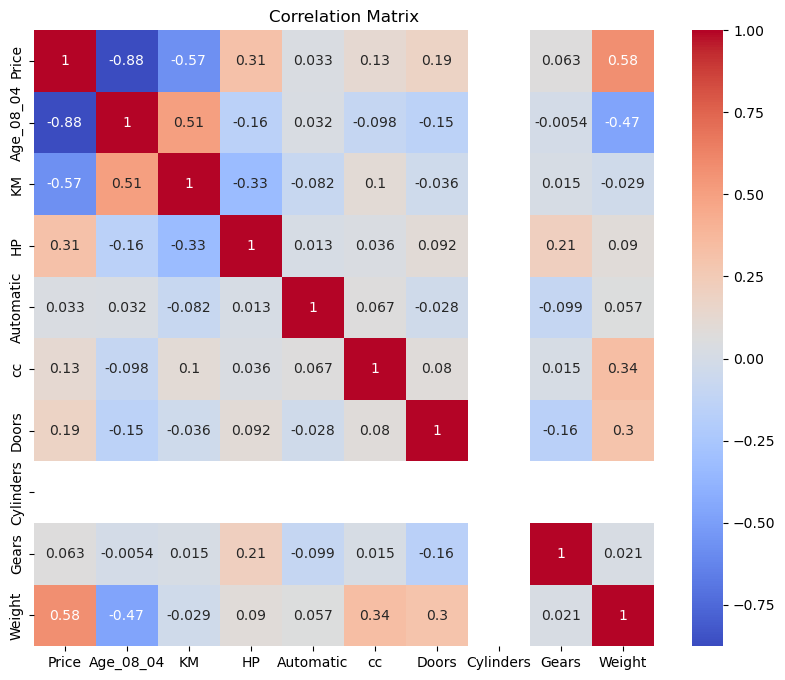

In [219]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

**Based on the analysis of the above correlation heatmap, we can conclude that**
* **Age and Price:** The strong negative correlation (-0.88) between Age and Price indicates that older cars tend to have lower prices. Age will be a highly significant predictor in your model.
* **Kilometers and Price:** Kilometers (KM) has a moderate negative correlation with Price (-0.57), meaning cars with higher mileage are generally cheaper. This makes Kilometers another important feature for the model.
* **Weight and Price:**  The positive correlation (0.58) between Weight and Price suggests that heavier cars tend to be more expensive. Including Weight as a feature could improve model accuracy.

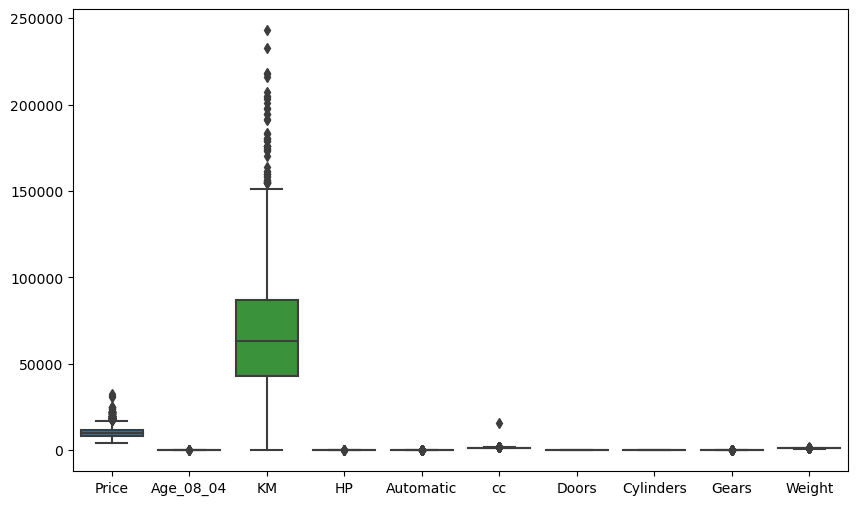

In [220]:
# To identify outliers in the dataset 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()

From the boxplot,we can see that there are prominent outliers in the 'Price', 'KM', and 'CC' columns. Additionally, smaller numbers of outliers are present in the other columns as well.

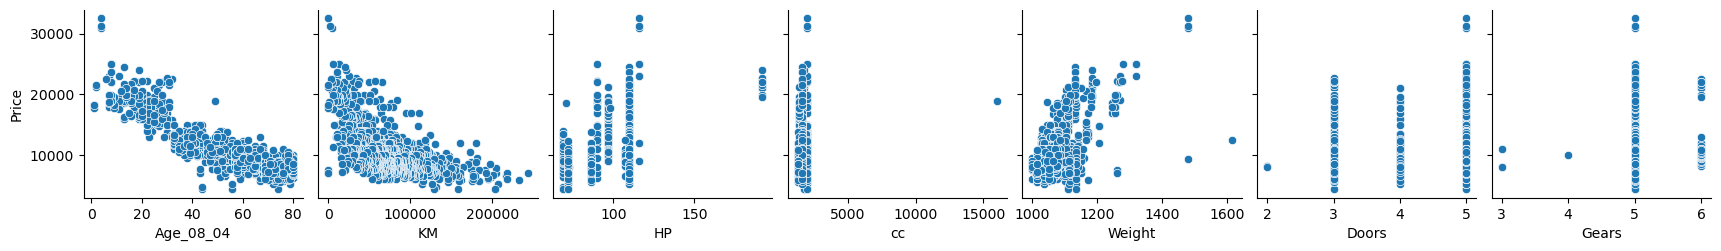

In [221]:
# Scatter plots to understand relationships between individual features and the target variable (Price)
sns.pairplot(df, x_vars=['Age_08_04', 'KM', 'HP', 'cc', 'Weight','Doors','Gears'], y_vars='Price', kind='scatter')
plt.show()

* **Age vs. Price:** There is a clear negative trend, where older cars tend to have lower prices. This reaffirms that Age is a strong predictor of price.
* **Kilometers (KM) vs. Price:**  A similar negative trend is seen, where higher mileage cars generally have lower prices, suggesting that KM is another important factor in the model.
* **Weight vs. Price:** A positive trend shows that heavier cars tend to have higher prices, making Weight a relevant feature for predicting price.

**Pre process the data to apply the MLR**

In [222]:
# Convert categorical variables (FuelType) to dummy variables
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

In [223]:
# Step 2: Identifying Outliers using IQR Method
# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[['Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Price']].quantile(0.25)
Q3 = df[['Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Price']].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((df[['Age_08_04', 'KM', 'HP', 'cc','Weight', 'Price']] < (Q1 - 1.5 * IQR)) | 
            (df[['Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Price']] > (Q3 + 1.5 * IQR)))

print("Outliers found in each column:")
print(outliers.sum())

# Step 3: Handling Outliers (Removing Outliers)
df_cleaned = df[~((df[['Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Price']] < (Q1 - 1.5 * IQR)) |
                  (df[['Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Price']] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Number of rows before removing outliers: {df.shape[0]}")
print(f"Number of rows after removing outliers: {df_cleaned.shape[0]}")

Outliers found in each column:
Age_08_04      7
KM            49
HP            11
cc           123
Weight        66
Price        110
dtype: int64
Number of rows before removing outliers: 1436
Number of rows after removing outliers: 1202


In [243]:
# Drop the "Cylinders" column since it has only one unique value
df_cleaned = df.drop(columns=['Cylinders'])

# Task 2: Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [244]:
# Step 4: Splitting the Dataset into Training and Testing Sets
X = df_cleaned.drop('Price', axis=1)
y = df_cleaned['Price']

In [245]:
# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [246]:
# Feature scaling using standardizationn 
scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Task 3. Model Building -  Multiple Linear Regression 


In [247]:
# Model 1: Basic Multiple Linear Regression
# Initialize and train the model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Predict and evaluate
y_pred1 = model1.predict(X_test)
# Calculate Mean Squared Error (MSE)
mse1 = mean_squared_error(y_test, y_pred1)
# Calculate R-squared (R^2)
r2_1 = r2_score(y_test, y_pred1)

print("Model 1: MSE =", mse1, ", R2 =", r2_1)

Model 1: MSE = 2203043.8231437025 , R2 = 0.8348888040611082


In [248]:
# Model 2: Multiple Linear Regression with Scaled Features
lr_scaled = LinearRegression() # get X_train and X_test form the standatredized data
lr_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = lr_scaled.predict(X_test_scaled)
# Calculate Mean Squared Error (MSE)
mse_2 = mean_squared_error(y_test, y_pred_scaled)

# Calculate R-squared (R^2)
r2_2 = r2_score(y_test, y_pred_scaled)

print("Model 2: MSE =", mse_2, ", R2 =", r2_2)


Model 2: MSE = 2203043.823143705 , R2 = 0.834888804061108


In [249]:
# Model 3: Multiple Linear Regression with feature selection (using selected features)
X_train_selected = X_train[['Age_08_04', 'KM', 'HP', 'Weight']]
X_test_selected = X_test[['Age_08_04', 'KM', 'HP', 'Weight']]


In [250]:
lr_selected = LinearRegression()
lr_selected.fit(X_train_selected, y_train)
y_pred_selected = lr_selected.predict(X_test_selected)
# Calculate Mean Squared Error (MSE) and R-squared (R^2) for Model 3
mse_3 = mean_squared_error(y_test, y_pred_selected)
r2_3 = r2_score(y_test, y_pred_selected)

print("Model 3: MSE =", mse_3, ", R2 =", r2_3)


Model 3: MSE = 1993321.0129730718 , R2 = 0.8506068681500581


# Task 4: Evaluate the performance of the model

In [251]:
print("\nModel 1: Basic Linear Regression")
print("MSE =", mse1, ", R2 =", r2_1)
print("\nModel 2: Linear Regression with Scaled Features")
print("MSE =", mse_2, ", R2 =", r2_2)
print("\nModel 3: Linear Regression with Feature Selection")
print("MSE =", mse_3, ", R2 =", r2_3)



Model 1: Basic Linear Regression
MSE = 2203043.8231437025 , R2 = 0.8348888040611082

Model 2: Linear Regression with Scaled Features
MSE = 2203043.823143705 , R2 = 0.834888804061108

Model 3: Linear Regression with Feature Selection
MSE = 1993321.0129730718 , R2 = 0.8506068681500581


* Model 3 shows the best performance, with the lowest MSE = 1,993,321.01 and the highest R^2 = 0.8506 indicating that focusing on key features such as Age, KM, HP, and Weight improves the models predictive accuracy.

* Model 1  and Model 2 have almost identical results, with an MSE of 2,203,043.82 and an R^2 of 0.8349, suggesting that feature scaling did not have a significant effect on the models performance.

# Task 5. Lasso and Ridge Regression


In [252]:
# Lasso Regression
lasso = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

In [253]:
# Ridge Regression
ridge = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)


In [254]:
# Evaluate Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Evaluate Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [255]:
#Evoluation of lasso Regression
print("\nLasso Regression")
print("Mean Squared Error:", mse_lasso)
print("R-squared:", r2_lasso)

# Evoluation of Ridge Regression
print("\nRidge Regression")
print("Mean Squared Error:", mse_ridge)
print("R-squared:", r2_ridge)


Lasso Regression
Mean Squared Error: 2202739.480842683
R-squared: 0.8349116135580271

Ridge Regression
Mean Squared Error: 2200942.874523292
R-squared: 0.8350462635431566


* Lasso Regression shows similar performance to the basic linear regression model, with a slightly reduced MSE =2,202,739.48 and an R^2 of 0.8349, indicating minimal improvement in predictive accuracy.

* Ridge Regression performs slightly better than Lasso, with a lower MSE = 2,200,942.87 and a marginally slightly higher R^2 = 0.8350, but the improvement is not significant compared to the baseline model.

 # Conclusion

**Multiple  Linear Regression Analysis:**
* **Model 3** Feature Selection outperforms the other models with the lowest MSE (1,993,321.01) and the highest R^2 (0.8506).
* **Model 1** and **Model 2** (Basic Linear Regression and Scaled Features) both perform similarly, with an MSE of 2,203,043 and an R^2 of 0.8349.

**Lasso and Ridge:**
* **Lasso Regression**: MSE = 2,202,739.48, R^2 = 0.8349 — Similar to Linear Regression with minimal improvement.
* **Ridge Regression**: MSE = 2,200,942.87, R^2 = 0.8350 — Slight improvement over Lasso and basic linear models, but not significant.
****
* **Model 3 with selected features provides the best performance. Ridge Regression offers minor improvements but not substantial enough to outperform the feature-selected linear model.**